<a href="https://colab.research.google.com/github/VectorBolt/instacart-webscraper/blob/main/scrape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Welcome
_______

Hello Instacart! Welcome to our team's Web Scraper! Please feel free to look around, and contact us with any questions or comments.

-- Avneesh, Aahaan, Manroop, and Risha

##Overview
_____
Our Webscraper is a Python program that scraped over 5000 one-star reviews from [Trustpilot](https://ca.trustpilot.com/review/instacart.com?stars=1) and [Sitejabber](https://www.sitejabber.com/reviews/instacart.com#reviews). We only analyzed one-star reviews because our intent was to determine the main problems customer's have with the Instacart.

Our program classifies the reviews into appropriate categories. After our preliminary research, we determined seven core issues that we wanted to look for in our reviews:

* **Pricing:** This refers to all issues customers have with Instacart's pricing.
* **Wrong Product:** This refers to occassions when the customer did not receive the product they wanted, often due to poor substitution choices
* **Theft:** This category involves situations when the shopper stole the customers groceries. It is important to note, however, that some of these instances may be situations where the customer *thought* the shopper stole groceries, when in reality some products were simply missing.
* **Cancellation:** Occassions when the customer's order was cancelled.
* **Delivery Issues:** This category generally refers to instances when the customer's order arrived late. However, it also includes situations when the shopper did not follow the customer's instructions.
* **Customer Service:** Issues relating to Instacart's customer service department.
* **Bad Food Choices:** Instances when the shopper chose bad groceries, which may be spoiled, rotten, expired, etc.

We also have a **Shopper Issues** category, which includes all reviews that would fit into the Wrong Product, Theft, Cancellation, Delivery Issues, and Bad Food Choices categories. We made this category to analyze the portion of reviews that had issues that could have been solved with better shoppers.

> Note that each time the program is run, the data might be slightly different. This is because reviews are constantly added to these websites, causing the data from one day to be slightly different from the data for the next day. However, the percentages will most likely remain in the same ballpark.


#Installing and Importing
___
The packages we will need to install are BeautifulSoup, lxml, and requests for Web Scraping. We will also need spaCy for natural language processing, which will help us categorize the reviews.

In [ ]:
# INSTALLING
# Note: Running this cell may not be necessary
!pip install beautifulsoup4

!pip install lxml

!pip install requests

!pip install spacy

!python -m spacy download en_core_web_sm

In [ ]:
# IMPORTING
# This cell must be run
from bs4 import BeautifulSoup
import requests
import csv
import spacy
nlp = spacy.load('en_core_web_sm')

#Scraping Reviews
___
This part of the program scrapes the reviews from each website and stores the data collected into CSV files. 

In [ ]:
# Removes spaces before and after string
# This function is necessary to remove the extra spaces in our data, 
# which are caused by scraping errors.
def format_text(text):
  if not text == None:
    i = text[0]
    while i == ' ' or i == '\n':
      text = text[1:]
      i = text[0]
    i = text[-1]
    while i == ' ' or i == '\n':
      text = text[:len(text)-1]
      i = text[-1]

    return text


The following cell scrapes the reviews from [Trustpilot](https://ca.trustpilot.com/review/instacart.com?stars=1) and stores the **Link** to the review, the **name of the reviewer**, the **rating** (which will always be one star), the **title** of the review, and the **content** of the review itself into a CSV file. 
> Currently, only one star reviews are being scraped.

In [ ]:
NUM_OF_PAGES = 210
#NUM_OF_PAGES = 25
num_of_trustpilot_reviews = 0

with open('trustpilot_one_star_reviews.csv', 'w') as csv_file_1:
  csv_writer = csv.writer(csv_file_1)

  csv_writer.writerow(['Link', 'Reviewer', 'Rating', 'Title', 'Review'])

  # Iterate over each page
  for page in range(1, NUM_OF_PAGES):
    # Link rules for each page
    if page == 1:
      source = requests.get('https://ca.trustpilot.com/review/instacart.com?stars=1').text
    else:
      source = requests.get(f'https://ca.trustpilot.com/review/instacart.com?page={page}&stars=1').text
    soup = BeautifulSoup(source, 'lxml')

    # Iterate over each review
    for article in soup.find_all('article'):
      # Get data
      review_link = f"https://ca.trustpilot.com{article.find('h2', class_ = 'review-content__title').a['href']}"
      reviewer = article.find('div', class_ = "consumer-information__name").text
      rating = article.find('div', class_ = "star-rating star-rating--medium").img['alt']
      review_title = article.find('h2', class_ = "review-content__title").a.text
      try:
        review_content = article.find('p', class_ = "review-content__text").text
      except AttributeError:
        review_content = None

      # format text
      reviewer = format_text(reviewer)
      review_title = format_text(review_title)
      review_content = format_text(review_content)

      # write to csv
      csv_writer.writerow([review_link, reviewer, rating, review_title, review_content])
      num_of_trustpilot_reviews += 1

print("Total number of reviews scraped: " + num_of_trustpilot_reviews)



The following cell scrapes the reviews from [Sitejabber](https://www.sitejabber.com/reviews/instacart.com#reviews) and stores the **Link** to the review, the **name of the reviewer**, the **rating** (which will always be one star), the **title** of the review, and the **content** of the review itself into a CSV file. 
> Currently, only one star reviews are being scraped.

In [ ]:
NUM_OF_PAGES = 62
#NUM_OF_PAGES = 16
num_of_sitejabber_reviews = 0

with open('sitejabber_one_star_reviews.csv', 'w') as csv_file_2:
  csv_writer = csv.writer(csv_file_2)

  csv_writer.writerow(['Link', 'Reviewer', 'Rating', 'Title', 'Review'])

  # Iterate over each page
  for page in range(1, NUM_OF_PAGES):
    # Link rules for each page
    if page == 1:
      source = requests.get('https://www.sitejabber.com/reviews/instacart.com#reviews').text
    else:
      source = requests.get(f'https://www.sitejabber.com/reviews/instacart.com?page={page}#reviews').text
    soup = BeautifulSoup(source, 'lxml')

    # Iterate over each review
    for review in soup.find_all('div', class_ = 'review__flex'):
      # Get data
      review_link = f"https://www.sitejabber.com{review.find('div', class_ = 'review__title').a['href']}"
      reviewer = review.find('div', class_ = "review__author__name").a.span.text
      rating = review.find('div', class_ = "stars")['title']
      review_title = review.find('span', class_ = "review__title__text").text
      try:
        review_content = review.find('div', class_ = "review__text").text
      except AttributeError:
        review_content = None
      
      # format text
      reviewer = format_text(reviewer)
      review_title = format_text(review_title)
      review_content = format_text(review_content)

      # write to csv
      if rating == "1.0 star rating":
        csv_writer.writerow([review_link, reviewer, rating, review_title, review_content])
        num_of_sitejabber_reviews += 1

print(num_of_sitejabber_reviews)


1342


This cell compiles all the reviews from both websites into one CSV file.



In [ ]:
with open('compiled_reviews.csv', 'w') as compiled_csv:
  csv_writer = csv.writer(compiled_csv)

  csv_writer.writerow(['Link', 'Reviewer', 'Rating', 'Title', 'Review'])

  with open('trustpilot_one_star_reviews.csv', 'r') as t_reviews:
    csv_reader = csv.reader(t_reviews)
    next(t_reviews)
    for line in csv_reader:
      csv_writer.writerow(line)

  with open('sitejabber_one_star_reviews.csv', 'r') as s_reviews:
      csv_reader = csv.reader(s_reviews)
      next(s_reviews)
      for line in csv_reader:
        csv_writer.writerow(line)

# Pre-Processing
___
This part of the program analyzes the scraped reviews and classifies them into relevant categories.
> **Note:** We also have an "Ethnic" category which was used to see the frequency of keywords and phrases relating to Ethnic groceries.

Our categorization was done by searching for keywords and key phrases. We used spaCy to tokenize the reviews, remove stop words, and lemmatize the reviews. This ensured that variations of our keywords, were converted into root words before classification.
> For example, the word "incorrectly" would be converted to the word "incorrect".

In [ ]:
# Sorting function
# This funciton classifies each review
def classify(review_title, review_content, tokens):
  categories = []

  keywords = {
    "Pricing": ['overpriced', 'expensive', 'markup', 'price', 'fee', 
                'charge', 'cost', 'purchase', 'ripoff', 'spend', 'scam', 
                'scammer', 'scamme'],
    "Wrong Product": ["wrong", "substitute", "choice", "replace", "change", 
                      "mistake", "miss", "substitutions", "incorrect"],
    "Theft": ["stolen", "steal", "stole", "rob", "drive-off", "theft", "receive"],
    "Cancellation": ["cancel", "delete"],
    "Delivery Issues": ["late", "reschedule", "schedule", "delay", "instruction"],
    "Customer Service": ["phone", "call", "refund", "reimburse", "support", "help"],
    "Bad Food Choices": ["soggy", "rotten", "rot", "spoil", "expire", "gross"],
    "Ethnic": ["halal", "indian", "muslim", "chinese", "korean", "kosher", "mexican", 
              "italian", "japanese", "vietnamese", "thai", "greek", "vegetarian", "vegan"],
    "Shopper Issues": ["wrong", "substitute", "choice", "replace", "change", 
                      "mistake", "miss", "substitutions", "incorrect",
                       "stolen", "steal", "stole", "rob", "drive-off", "theft", "receive",
                       "cancel", "delete", 
                       "late", "reschedule", "schedule", "delay", "instruction"
                       "soggy", "rotten", "rot", "spoil", "expire", "gross"]  
  }

  phrases = {
      "Pricing": ['marked up', 'rip off', 'ripping off', 'ripped off', "mark up"],
      "Wrong Product": ["not what i wanted", "didn't want", "did not want"],
      "Theft": ["not deliver", "not delivered", "didn't show up", "did not show up", "wasn't delivered"],
      "Cancellation": ["never received"],
      "Delivery Issues": ["delivery time"],
      "Customer Service": ["customer service", "help desk"],
      "Bad Food Choices": [],
      "Shopper Issues": ["not what i wanted", "didn't want", "did not want",
                         "not deliver", "not delivered", "didn't show up", "did not show up", "wasn't delivered",
                         "never received", "delivery time"]
  }

  for key, value_list in keywords.items():
    for keyword in value_list:
      if keyword in tokens:
        categories.append(key)
        break

  for key, value_list in phrases.items():
    for phrase in value_list:
      if phrase in review_title or phrase in review_content:
        categories.append(key)
        break

  return categories


In [ ]:
# This cell categorizes all the reviews that were scraped

# Opening the CSV containing all the reviews
with open('compiled_reviews.csv', 'r') as compiled_csv:
  reader_fieldnames = ['Link', 'Reviewer', 'Rating', 'Title', 'Review']
  csv_reader = csv.DictReader(compiled_csv, fieldnames = reader_fieldnames)
  next(compiled_csv)

  # Creating a new CSV that includes one column for "Categories",
  # in addition to the standard columns.
  with open('preprocessed_reviews.csv', 'w') as preprocessed_csv:
    writer_fieldnames = ['Category', 'Link', 'Reviewer', 'Rating', 'Title', 'Review']
    csv_writer = csv.DictWriter(preprocessed_csv, fieldnames = writer_fieldnames)
    
    csv_writer.writeheader()

    # Making the reviews entirely lowercase for better analysis
    for review in csv_reader:
      header_text = review['Title'].lower()
      content_text = review['Review'].lower()

      # Using spaCy for natural language processing
      doc_header = nlp(header_text)
      doc_content = nlp(content_text)

      token_list = []

      for token in doc_header:
        if (not token.is_punct) and (not token.is_stop):
          token_list.append(token.lemma_)

      for token in doc_content:
        if (not token.is_punct) and (not token.is_stop):
          token_list.append(token.lemma_)
      
      categories = classify(header_text, content_text, token_list)
      categories = list(set(categories)) # remove duplicate categories
      
      # Append each applicable category
      category_string = ""
      for category in categories:
        category_string += category + ";"

      # Write to CSV
      csv_writer.writerow({
          'Category': category_string,
          'Link': review['Link'],
          'Reviewer': review['Reviewer'],
          'Rating': review['Rating'],
          'Title': review['Title'],
          'Review': review['Review']
          })
      

#Data Visualization
___
And now for the big reveal! This section of the program visualizes the data by converting it into a bar graph. 

In [ ]:
# INSTALLING

!pip install matplotlib

!pip install pandas


In [ ]:
# IMPORTING
from matplotlib import pyplot as plt
import pandas as pd
from collections import Counter

Total number of reviews analyzed: 5522


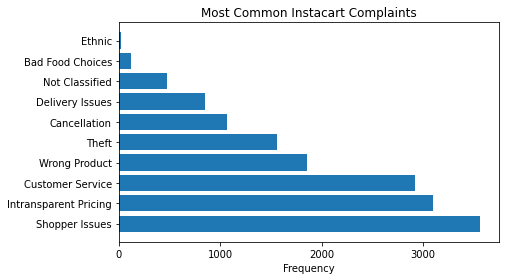

In [ ]:
# CREATING THE BAR GRAPH
data = pd.read_csv('preprocessed_reviews.csv')
reviews_category_column = data['Category']

complaint_counter = Counter()
errors = []

# Keep track of number of reviews

total_num_of_reviews = 0

for review_categories in reviews_category_column:
  try:
    category_list = review_categories.split(';')
  except: 
    category_list = ["Not Classified"]
  complaint_counter.update(category_list)
  total_num_of_reviews += 1

complaint_categories = []
frequency = []

for item in complaint_counter.most_common():
  complaint_categories.append(item[0])
  frequency.append(item[1])

# Remove first item because for some reason the first item includes all reviews
# TODO: This problem seems to occur when the categories are split on the ';'
complaint_categories.pop(0)
frequency.pop(0)

plt.title("Most Common Instacart Complaints")
plt.xlabel("Frequency")
plt.style.use('seaborn-poster')
plt.tight_layout()
plt.barh(complaint_categories, frequency)
plt.savefig('plot.jpg', dpi=300, bbox_inches='tight')

print("Total number of reviews analyzed: " + str(total_num_of_reviews))

The following cells list the exact number of reviews that fit into each category, as well as the percentages of reviews that fit into each category. 
> Note that the percentages do not add up to 100%, and the frequencies do not add up to the total number of reviews. This is because for most reviews, there is overlap. Each review may fit into multiple categories. Our goal was to analyze the frequency of each type of problem.

In [ ]:
for i, j in zip(complaint_categories, frequency):
  print(i, j)


Shopper Issues 3568
Intransparent Pricing 3104
Customer Service 2923
Wrong Product 1859
Theft 1557
Cancellation 1070
Delivery Issues 854
Not Classified 478
Bad Food Choices 118
Ethnic 16


The following cell lists the percentage of reviews that fit into each category. As of December 6, 2020, this is the data we collected.

In [ ]:
for i, j in zip(complaint_categories, frequency):
  percentage = (j/total_num_of_reviews)*100
  percentage = round(percentage, 2)
  print(str(percentage) + "% of reviews complained about", i)

64.61% of reviews complained about Shopper Issues
56.21% of reviews complained about Intransparent Pricing
52.93% of reviews complained about Customer Service
33.67% of reviews complained about Wrong Product
28.2% of reviews complained about Theft
19.38% of reviews complained about Cancellation
15.47% of reviews complained about Delivery Issues
8.66% of reviews complained about Not Classified
2.14% of reviews complained about Bad Food Choices
0.29% of reviews complained about Ethnic


As of December 6, 2020, this is the data we collected. The data in the code cells above, as well as the bar graph, may vary depending on when the program is run, since new reviews are added very often.

Category | Frequency | Percentage
:---: | :---:| :---:
Shopper Issues | 3568 | 64.61%
Intransparent Pricing | 3104 | 56.21%
Customer Service | 2923 | 52.93%
Wrong Product | 1859 | 33.67%
Theft | 1557 | 28.2%
Cancellation | 1070 | 19.38%
Delivery Issues | 854 | 15.47%
Not Classified | 478 | 8.66%
Bad Food Choices | 118 | 2.14%
Ethnic | 16 | 0.29%

#Specialized CSVs
We also created separate CSVs for all reviews that fit into certain categories for our own analysis.

In [ ]:
def create_specialized_csv(category, csv_name):
  with open('preprocessed_reviews.csv') as preprocessed_csv:
    reader_fieldnames = ['Category', 'Link', 'Reviewer', 'Rating', 'Title', 'Review']
    csv_reader = csv.DictReader(preprocessed_csv, fieldnames = reader_fieldnames)
    next(preprocessed_csv)

    with open(f'{csv_name}.csv', 'w') as specialized_csv:
      writer_fieldnames = ['Other Categories', 'Link', 'Reviewer', 'Rating', 'Title', 'Review']
      csv_writer = csv.DictWriter(specialized_csv, fieldnames = writer_fieldnames)
      
      csv_writer.writeheader()

      for review in csv_reader:
        if f"{category}" in review['Category']:
          csv_writer.writerow({
            'Other Categories': review['Category'],
            'Link': review['Link'],
            'Reviewer': review['Reviewer'],
            'Rating': review['Rating'],
            'Title': review['Title'],
            'Review': review['Review']
            })

In [ ]:
# Creating a Customer Service CSV

create_specialized_csv("Customer Service", "customer_service")
        

In [ ]:
# Wrong Product CSV
create_specialized_csv("Wrong Product", "wrong_product")

In [ ]:
# Theft CSV
create_specialized_csv("Theft", "theft")

In [ ]:
# Not Classified CSV

with open('preprocessed_reviews.csv') as preprocessed_csv:
  reader_fieldnames = ['Category', 'Link', 'Reviewer', 'Rating', 'Title', 'Review']
  csv_reader = csv.DictReader(preprocessed_csv, fieldnames = reader_fieldnames)
  next(preprocessed_csv)

  with open('not_classified.csv', 'w') as customer_service_csv:
    writer_fieldnames = ['Categories', 'Link', 'Reviewer', 'Rating', 'Title', 'Review']
    csv_writer = csv.DictWriter(customer_service_csv, fieldnames = writer_fieldnames)
    
    csv_writer.writeheader()

    for review in csv_reader:
      if review['Category'].split(';') == ['']:
        csv_writer.writerow({
          'Categories': review['Category'],
          'Link': review['Link'],
          'Reviewer': review['Reviewer'],
          'Rating': review['Rating'],
          'Title': review['Title'],
          'Review': review['Review']
          })